In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def detect_zipno(fname):
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    img = img[0:h//2, w//3:]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    cnts, _ = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if not(50 < w < 70): continue
        result.append([x, y, w, h])
    result = sorted(result, key=lambda x: x[0])
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

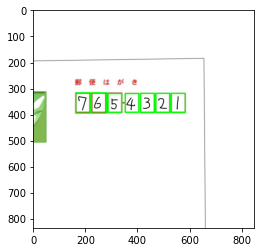

In [3]:
cnts, img = detect_zipno("../../images/ch3-letter01.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("../../images/ch3-detect-zip1.png", dpi=200)
plt.show()

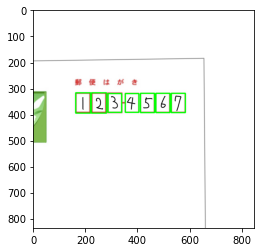

In [4]:
cnts, img = detect_zipno("../../images/ch3-letter02.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("../../images/ch3-detect-zip2.png", dpi=200)
plt.show()

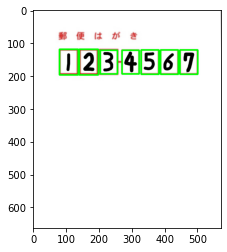

In [5]:
cnts, img = detect_zipno("../../images/ch3-hagaki1.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("../../images/ch3-detect-zip3.png", dpi=200)
plt.show()

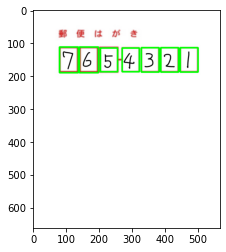

In [6]:
cnts, img = detect_zipno("../../images/ch3-hagaki2.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("../../images/ch3-detect-zip4.png", dpi=200)
plt.show()